**Step 1: Load Your Dataset and Preprocess Images**

We will:
- Read labels from classification.json
- Load images from C:\MurthyLab\project_classification\Water melon
- Apply data augmentation to increase the dataset's variety (important for small datasets)
- Normalize images for better model generalization

**Project Outline:** Watermelon Classification Using Deep Learning

our project aims to classify images of watermelons as "Good to Harvest" or "Not Good to Harvest" using a deep learning model.

1. **Overview**

**• Goal:** Automate watermelon classification using a trained Convolutional Neural Network (CNN).

**• Dataset:** Images with labels (good-to-harvest and not-good-to-harvest).

**• Tech Stack:** Python, PyTorch, Torchvision, Pillow, Matplotlib, JSON.

**2. Workflow**

**Step 1: Dataset Preparation**

• Organize images into train, val, and test directories.

• Extract labels from JSON (classification.json).

• Perform data augmentation (flips, rotations, color jitter)

**Step 2: Model Selection & Training**

• I Choose a CNN-based architecture:

**• ResNet-18 / ResNet-50** – High accuracy, robust performance.

**• EfficientNet** – Balanced between speed and precision.

**• MobileNetV2** – Lightweight for mobile deployment.

• Train model using CrossEntropy loss & Adam optimizer.

**Step 3: Model Evaluation**

• Calculate accuracy, precision-recall, and F1-score.

• I Use confusion matrix to check misclassifications

**Step 4: Inference & Deployment**

• Develop predict_image() function for real-time predictions.

• Save the trained model and deploy it for usage.

**3. Algorithms Used**

**Data Processing Algorithms**

**• Image Transformations:** Resize, Flip, Rotate, Normalize.

**• JSON Parsing:** Extract label information.

**Deep Learning Algorithms**

• CNN (Convolutional Neural Network) – Core algorithm.

• Pretrained Models (ResNet, EfficientNet, MobileNetV2) – Used for better accuracy.

**Optimization Algorithms**

**• Adam / SGD (Stochastic Gradient Descent)** – Adjusts model weights.

**• Batch Normalization & Dropout** – Prevents overfitting

**Evaluation Algorithms**

**• Accuracy, Precision-Recall, F1-score** – Measures model performance.

**• Confusion Matrix** – Checks misclassified images

4. **Libraries Used**

**• PyTorch** → Neural networks & deep learning.

**• Torchvision** → Pretrained models, dataset handling.

**• PIL (Pillow)** → Image processing.

**• Matplotlib** → Visualization.

**• OS & JSON** → File & label management.

**5. Final Deliverables**

• Trained Model for classifying images.

• Prediction Script (predict_image() function).

• Performance Report (Accuracy, Loss Graph, Evaluation Metrics).































**Project Outline:** Watermelon Classification Using Deep Learning

our project aims to classify images of watermelons as "Good to Harvest" or "Not Good to Harvest" using a deep learning model.

1. **Overview**

**• Goal:** Automate watermelon classification using a trained Convolutional Neural Network (CNN).

**• Dataset:** Images with labels (good-to-harvest and not-good-to-harvest).

**• Tech Stack:** Python, PyTorch, Torchvision, Pillow, Matplotlib, JSON.

**2. Workflow**

**Step 1: Dataset Preparation**

• Organize images into train, val, and test directories.

• Extract labels from JSON (classification.json).

• Perform data augmentation (flips, rotations, color jitter)

**Step 2: Model Selection & Training**

• I Choose a CNN-based architecture:

**• ResNet-18 / ResNet-50** – High accuracy, robust performance.

**• EfficientNet** – Balanced between speed and precision.

**• MobileNetV2** – Lightweight for mobile deployment.

• Train model using CrossEntropy loss & Adam optimizer.

**Step 3: Model Evaluation**

• Calculate accuracy, precision-recall, and F1-score.

• I Use confusion matrix to check misclassifications

**Step 4: Inference & Deployment**

• Develop predict_image() function for real-time predictions.

• Save the trained model and deploy it for usage.

**3. Algorithms Used**

**Data Processing Algorithms**

**• Image Transformations:** Resize, Flip, Rotate, Normalize.

**• JSON Parsing:** Extract label information.

**Deep Learning Algorithms**

• CNN (Convolutional Neural Network) – Core algorithm.

• Pretrained Models (ResNet, EfficientNet, MobileNetV2) – Used for better accuracy.

**Optimization Algorithms**

**• Adam / SGD (Stochastic Gradient Descent)** – Adjusts model weights.

**• Batch Normalization & Dropout** – Prevents overfitting

**Evaluation Algorithms**

**• Accuracy, Precision-Recall, F1-score** – Measures model performance.

**• Confusion Matrix** – Checks misclassified images

4. **Libraries Used**

**• PyTorch** → Neural networks & deep learning.

**• Torchvision** → Pretrained models, dataset handling.

**• PIL (Pillow)** → Image processing.

**• Matplotlib** → Visualization.

**• OS & JSON** → File & label management.

**5. Final Deliverables**

• Trained Model for classifying images.

• Prediction Script (predict_image() function).

• Performance Report (Accuracy, Loss Graph, Evaluation Metrics).































In [18]:
import os
import json
import torch
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image

# Paths
json_path = r"C:\MurthyLab\project_classification\classification.json"
image_dir = r"C:\MurthyLab\project_classification\Water melon"

# Define label mapping
label2idx = {
    "good-to-harvest": 1,
    "not-good-to-harvest": 0
}

# Transformations with Augmentation
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Slightly larger than standard 224x224
    transforms.RandomHorizontalFlip(p=0.5),  # Augments dataset
    transforms.RandomRotation(degrees=15),  # Adds variation
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Define Dataset Class
class WatermelonDataset(Dataset):
    def __init__(self, json_path, image_dir, transform=None):
        self.image_dir = image_dir
        self.transform = transform
        self.samples = []

        # Load JSON
        with open(json_path, 'r') as f:
            data = json.load(f)

        image_files = sorted(os.listdir(image_dir))

        for i, item in enumerate(data):
            try:
                annotations = item.get("annotations", [])
                if not annotations:
                    continue
                
                result = annotations[0].get("result", [])
                if not result:
                    continue

                choices = result[0].get("value", {}).get("choices", [])
                if not choices:
                    continue

                label = choices[0].lower()
                if label not in label2idx:
                    print(f"Skipping item {i}: Unknown label '{label}'")
                    continue

                if i >= len(image_files):
                    continue

                image_file = image_files[i]
                image_path = os.path.join(self.image_dir, image_file)

                if not os.path.exists(image_path):
                    continue

                self.samples.append((image_file, label2idx[label]))

            except Exception as e:
                print(f"Skipping item {i} due to error: {e}")

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        image_name, label = self.samples[idx]
        image_path = os.path.join(self.image_dir, image_name)
        image = Image.open(image_path).convert("RGB")

        if self.transform:
            image = self.transform(image)

        return image, label

# Load Dataset
dataset = WatermelonDataset(json_path, image_dir, transform=transform)
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

print(f"Dataset Loaded with {len(dataset)} samples.")

Dataset Loaded with 108 samples.


# Libraryies

Let's Understand Each Import:
**1. import os**

What it is: A built-in Python library.

Why we use it: To interact with your computer’s file system (e.g., listing files, joining paths).

How it works: You use os.listdir(), os.path.join(), etc., to find or open files and folders.

**2. import json**

What it is: A built-in Python library.

Why we use it: To read/write JSON files (which store structured data like labels or annotations).

How it works: json.load() reads JSON from a file and converts it into Python dictionaries/lists.

3. **import torch**

What it is: The main PyTorch library.

Why we use it: For creating and training machine learning models, especially deep learning.

How it works: It provides Tensors, model classes (nn.Module), optimizers, loss functions, etc.

History: Developed by Facebook’s AI Research (FAIR) lab in 2016.

Latest Features (as of 2025):

torch.compile for faster model training.

Native support for Apple Silicon (M1/M2).

More CUDA operations for GPU use.

Advantage: Pythonic, flexible, supports GPUs.

Disadvantage: Slightly harder than scikit-learn for beginners.

Where it's used: Deep learning tasks like image classification, object detection, NLP, etc.

**4. import torchvision.transforms as transforms**

What it is: A part of torchvision, which is PyTorch’s image library.

Why we use it: To preprocess and augment images before training.

How it works: You define a list of transformations (resize, flip, normalize, etc.) and apply them to your image.


5. **from torch.utils.data import Dataset, DataLoader**

What it is: PyTorch utilities for loading data efficiently.

Why we use it:

Dataset: Create a custom class to read images and labels.

DataLoader: Wraps your dataset into batches and shuffles them.

How it works:

You define how to load each item in a Dataset.

DataLoader calls it repeatedly in batches while training.

Advantage: Handles large datasets efficiently.

Disadvantage: You must define logic carefully (e.g., handle errors)

6. **from PIL import Image**

What it is: A Python library for handling image files.

Why we use it: To open and convert images to formats PyTorch understands (like RGB).

How it works: Image.open("path") loads an image from a file. You can then apply transformations.

History: PIL (Python Imaging Library) is old; now maintained as Pillow, its modern version.

| Concept       | Linked With                         |
| ------------- | ----------------------------------- |
| Image loading | `PIL.Image`, `os`, `Dataset`        |
| Data labels   | `json`, `Dataset`                   |
| Preprocessing | `transforms`                        |
| Training      | `DataLoader`, `torch`               |
| GPU Training  | `torch` (can use CUDA if available) |


# Define label mapping

✅ What is this?
This is a Python dictionary that converts text labels (like "good-to-harvest") into numbers (like 1 and 0).

❓ Why do we use this?
Deep learning models cannot understand text like "good-to-harvest" or "not-good-to-harvest".
They only understand numbers.

So, we map the text labels to numbers using this dictionary.

🔢 How it works:
When a label is "good-to-harvest", the dictionary gives it the value 1.

When a label is "not-good-to-harvest", the dictionary gives it the value 0.

# Transformations with Augmentation

✅ What is this?
This creates a set of image processing steps (called transformations) that are applied to each image before training the model.

Think of it like:
📷 Raw Image ➜ ✨ Resize ➜ 🔄 Flip ➜ 🌀 Rotate ➜ 🌈 Brightness change ➜ 💾 Tensor ➜ 📉 Normalize

❓ Why do we use this?
🧠 To help the model learn better.

🔁 To create more variety in the data (especially useful when you have a small dataset).

📏 To make all images same size, same format, and normalized for better training.

🔍 Each Line Explained:
1. transforms.Resize((256, 256))
📐 Resizes all images to 256x256 pixels.

Makes sure the model gets same size input every time.

2. transforms.RandomHorizontalFlip(p=0.5)
🔁 Randomly flips the image left-right 50% of the time.

Adds variation (like if fruit appears facing left or right).

3. transforms.RandomRotation(degrees=15)
🌀 Randomly rotates the image by ±15 degrees.

Helps model handle tilted images.

4. transforms.ColorJitter(...)
🌈 Randomly changes:

brightness: lighter or darker

contrast: stronger or weaker details

saturation: richer or duller colors

Simulates different lighting conditions.

5. transforms.ToTensor()
🧮 Converts image to PyTorch tensor.

Tensors are like multi-dimensional arrays.

Model needs input in tensor format (not image format like PNG or JPG).

6. transforms.Normalize(mean=[...], std=[...])
📉 Makes pixel values centered around 0 with a standard range.

These values are standard for ImageNet (a big dataset). It's okay to use here if you're using pre-trained models.

📦 What is transforms.Compose()?
It combines all steps into one.
So when we write transform(image), it:

resizes it

flips it

rotates it

tweaks color

converts to tensor

normalizes it
All in one step.
What is a Tensor?
🔹 In simple terms:
A tensor is just a container that holds numbers — like a box.
It's similar to scalars, vectors, and matrices, but more general.
| Type       | Shape Example       | What it means                           |
| ---------- | ------------------- | --------------------------------------- |
| **Scalar** | `1` or `()`         | Just a single number (e.g., 5)          |
| **Vector** | `(3,)`              | A list of numbers (e.g., \[5, 7, 2])    |
| **Matrix** | `(2, 3)`            | A table of numbers (2 rows × 3 columns) |
| **Tensor** | `(3, 3, 3)` or more | A cube or more dimensions               |


**Backend of Maths**

How Normalize(mean, std) works mathematically — Step by Step
1️⃣ Raw Image Pixel Value
Each image pixel is originally an integer from 0 to 255 for each color channel (Red, Green, Blue).

Example:
| Pixel channel | Value (0-255) |
| ------------- | ------------- |
| Red (R)       | 100           |
| Green (G)     | 150           |
| Blue (B)      | 200           |


2️⃣ Convert pixel values to [0, 1] range (ToTensor step)
This is done by dividing by 255:

**Formula's**

pixel_float= pixel_input/225
 for calculate mean = pixel_value/total no of pixels
 std = srt(pixel_value - mean)**2/total no of pixels 
 normalized_pixel = pixel_float-mean/std

 #  Define Dataset Class

 **What does each line do?**

 | Line                                                        | Explanation                                                                                                                                                  |
| ----------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| `class WatermelonDataset(Dataset):`                         | Defines a new class named `WatermelonDataset` that extends PyTorch’s `Dataset` class.                                                                        |
| `def __init__(self, json_path, image_dir, transform=None):` | The **constructor** method: called when you create an instance of this class. Takes parameters: JSON file path, folder with images, and optional transforms. |
| `self.image_dir = image_dir`                                | Stores the path to your image folder in the instance, so the class knows where to find images.                                                               |
| `self.transform = transform`                                | Stores the transformation pipeline (resize, normalize, augment) so it can be applied later.                                                                  |
| `self.samples = []`                                         | Creates an empty list to store `(image_file, label)` pairs that will be filled later.                                                                        |



# Load JSON

**✅ What your code is doing (with where math applies):**

| Step | Code Section               | Action Description                                              | Math Involved? | Explanation                                                   |
| ---- | -------------------------- | --------------------------------------------------------------- | -------------- | ------------------------------------------------------------- |
| 1    | `with open(json_path)`     | Loads label info from a JSON file.                              | ❌              | Just reading file. No math.                                   |
| 2    | `if not annotations`, etc. | Safely extracts label (e.g., "good-to-harvest") for each image. | ❌              | Just conditional checks.                                      |
| 3    | `self.samples.append(...)` | Pairs the image filename and its numeric label (`0` or `1`).    | ❌              | Just storing data.                                            |
| 4    | `__len__()`                | Returns number of samples.                                      | ❌              | Built-in function.                                            |
| 5    | `__getitem__()`            | Loads image, applies transform, returns image and label.        | ✅              | This is where math is involved — especially in the transform. |
| 6    | `self.transform(image)`    | Applies transforms like Resize, ToTensor, Normalize.            | ✅✅✅            | This is the **main part where all the math happens**.         |

**📌 Step-by-step Math (with Formulas & Example)**

| Transform           | Formula / Math Used | What It Does                                              | Example                                            |
| ------------------- | ------------------- | --------------------------------------------------------- | -------------------------------------------------- |
| **Resize(256×256)** | Interpolation       | Rescales the image using bilinear/bicubic math.           | Original image resized to 256×256.                 |
| **ToTensor()**      | `pixel / 255.0`     | Converts pixel values from 0–255 → 0.0–1.0                | `pixel = 128 → 128/255 = 0.502`                    |
| **Normalize()**     | `z = (x - μ) / σ`   | Standardizes using ImageNet stats. This is **core math**. | For R-channel: `z = (0.502 - 0.485)/0.229 ≈ 0.074` |

**📊 Tabular Summary of Normalization Math**

| Channel | Pixel (x) | Mean (μ) | Std (σ) | Normalized Value `(x−μ)/σ`  |
| ------- | --------- | -------- | ------- | --------------------------- |
| R       | 0.502     | 0.485    | 0.229   | (0.502−0.485)/0.229 = 0.074 |
| G       | 0.470     | 0.456    | 0.224   | (0.470−0.456)/0.224 = 0.062 |
| B       | 0.410     | 0.406    | 0.225   | (0.410−0.406)/0.225 = 0.017 |

**📸 Image Format Before and After Transform**

| Stage           | Type             | Shape     | Range          |
| --------------- | ---------------- | --------- | -------------- |
| Original        | PIL Image        | (H, W, 3) | 0–255          |
| After ToTensor  | Tensor (float32) | (3, H, W) | 0.0–1.0        |
| After Normalize | Tensor (float32) | (3, H, W) | \~\[-2.0, 2.0] |

 
**interlink concepts of 1️⃣ transforms.Resize((256, 256))**

| Method   | Neighbors Used | Quality | Speed  | Used In             |
| -------- | -------------- | ------- | ------ | ------------------- |
| interpolation  | 1 pixel        | Low     | Fast   | Quick resize        |
| Bilinear | 4 pixels       | Medium  | Fast   | Most models         |
| Bicubic  | 16 pixels      | High    | Slower | High-res processing |

# Load Dataset

🔍 What it means:
You're creating an object of your custom dataset class WatermelonDataset.

You’re passing:

json_path: the path to your labeled data (like "project.json"),

image_dir: the folder where all the images are,

transform: the image transformations like Resize, Flip, Normalize, etc.

🧠 What happens internally:
Python runs __init__() of WatermelonDataset.

It reads the JSON, maps labels (like “good” or “bad”), and pairs them with corresponding image files.

The images are not loaded yet — just file names and labels are stored in memory.

Your dataset now knows:
"img001.jpg" → label 0, "img002.jpg" → label 1, etc.

🔍 What it means:
Wraps your dataset into a DataLoader.

Now it will give you images in batches of 16.

shuffle=True makes sure the data is randomized in every epoch (important for training!).

🧠 What happens when you use this in training:
It does:

Picks 16 image-label pairs.

Loads the image using __getitem__() from your dataset class.

Applies the transform pipeline:

Resize (using bilinear math interpolation)

Flip / Rotate (random decisions)

Convert to Tensor












In [19]:
pip install torch torchvision matplotlib

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [20]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.models as models
from torch.utils.data import DataLoader, Dataset
from PIL import Image

In [21]:
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [23]:
class CustomDataset(Dataset):
    def __init__(self, image_dir, transform=None):
        self.image_dir = image_dir
        self.transform = transform
        self.samples = []

        # Loop through subdirectories
        for class_name in os.listdir(image_dir):
            class_path = os.path.join(image_dir, class_name)
            if os.path.isdir(class_path):  # Ensure it's a folder
                label = 0 if class_name == "good-to-harvest" else 1
                for img in os.listdir(class_path):
                    if img.endswith(('.jpg', '.png', '.jpeg')):
                        self.samples.append((os.path.join(class_path, img), label))

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        image_path, label = self.samples[idx]
        image = Image.open(image_path).convert("RGB")

        if self.transform:
            image = self.transform(image)

        return image, label


# Loop through subdirectories

1. Goes into each folder in your image_dir.

2. If the folder name is "good-to-harvest", label = 0, else label = 1.

3. Inside each folder, it collects all images (.jpg, .jpeg, .png) and stores their path with label.

4. __len__: Returns how many total images are there.

5. __getitem__: Opens one image, applies transform if needed, and returns image and label.


In [24]:
import torchvision.models as models
import torch.nn as nn

model = models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, 2)  # For binary classification


In [25]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()  # Define the loss function
optimizer = optim.Adam(model.parameters(), lr=0.0005)  # Define the optimizer

**Backend Maths**

🎯 Example:
Let’s say:

Model output (logits) = [2.0, 1.0, 0.1]

True label = class 0

**✅ Step 1: Softmax Activation (Converts logits → probabilities)**

| Name  | Value | Meaning           |
| ----- | ----- | ----------------- |
| $z_0$ | 2.0   | Logit for class 0 |
| $z_1$ | 1.0   | Logit for class 1 |
| $z_2$ | 0.1   | Logit for class 2 |

Now compute exponentials:

| Name                  | Value |
| --------------------- | ----- |
| $e^{z_0}$ = $e^2.0$   | 7.39  |
| $e^{z_1}$ = $e^1.0$   | 2.71  |
| $e^{z_2}$ = $e^{0.1}$ | 1.105 |

Sum of exponentials:

sum = 7.39+2.71+1.105=11.205
Now compute softmax probs:

| Element | Formula                  | Value  | Meaning                |
| ------- | ------------------------ | ------ | ---------------------- |
| $p_0$   | $\frac{e^{2.0}}{11.205}$ | 0.659  | Probability of class 0 |
| $p_1$   | $\frac{e^{1.0}}{11.205}$ | 0.242  | Probability of class 1 |
| $p_2$   | $\frac{e^{0.1}}{11.205}$ | 0.0986 | Probability of class 2 |

**✅ Step 2: CrossEntropy Loss**

 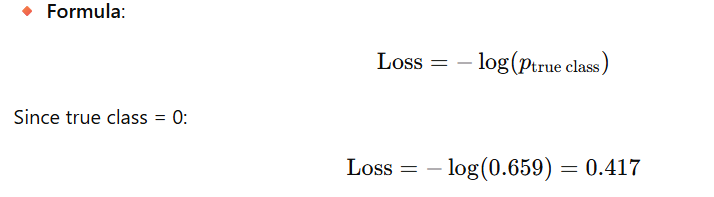

 | Element           | Value | Meaning                      |
| ----------------- | ----- | ---------------------------- |
| $p_{\text{true}}$ | 0.659 | Probability of correct class |
| Loss              | 0.417 | How wrong the model is       |

**✅ Step 3: Backward Pass (Gradient Computation)**

PyTorch auto-calculates:    ∂W/∂Loss

Let’s assume:

Weight: 𝑊=0.5
Gradient (∂Loss/∂W): grad = 0.8 (random example)

**✅ Step 4: Weight Update Using Adam Optimizer**

 Formula:  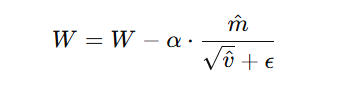

 Let’s say:
m = 0.8 → (1st moment = mean of gradients)
v = 0.64 → (2nd moment = mean of squared gradients)
𝜖 = 10(pow)−8​

Compute update:

update=0.0005⋅ 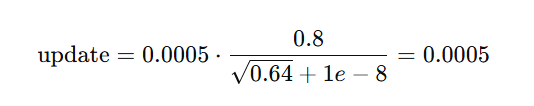
New weight:
W=0.5−0.0005=0.4995

| Name         | Value  | Meaning                   |
| ------------ | ------ | ------------------------- |
| $\alpha$     | 0.0005 | Learning rate             |
| $\hat{m}$    | 0.8    | Avg. of gradients         |
| $\hat{v}$    | 0.64   | Avg. of squared gradients |
| $W$ (before) | 0.5    | Old weight                |
| update       | 0.0005 | Change in weight          |
| $W$ (after)  | 0.4995 | New weight                |

**🧠 Summary Table**

| Step          | Element Name                    | Value                   | Meaning |
| ------------- | ------------------------------- | ----------------------- | ------- |
| Logits        | $z = [2.0, 1.0, 0.1]$           | raw scores              |         |
| Softmax       | $p = [0.659, 0.242, 0.0986]$    | class probabilities     |         |
| True Class    | $y = 0$                         | correct class index     |         |
| Loss          | $-\log(0.659) = 0.417$          | how wrong prediction is |         |
| Gradient      | $\partial L/\partial W = 0.8$   | change needed           |         |
| Adam Params   | $\hat{m} = 0.8, \hat{v} = 0.64$ | optimizer stats         |         |
| Learning Rate | $\alpha = 0.0005$               | controls step size      |         |
| New Weight    | $0.4995$                        | updated value           |         |



​


 
 
​


In [27]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

epochs = 50

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in dataloader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Calculate accuracy
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(dataloader)
    epoch_acc = 100 * correct / total

    print(f"Epoch {epoch+1}/{epochs} — Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.2f}%")

print("Training complete!")

# Save the model weights after training
torch.save(model.state_dict(), "model.pth")
print("Model saved as model.pth")


Epoch 1/50 — Loss: 0.6243, Accuracy: 71.30%
Epoch 2/50 — Loss: 0.5860, Accuracy: 73.15%
Epoch 3/50 — Loss: 0.4729, Accuracy: 82.41%
Epoch 4/50 — Loss: 0.4318, Accuracy: 80.56%
Epoch 5/50 — Loss: 0.2624, Accuracy: 89.81%
Epoch 6/50 — Loss: 0.2242, Accuracy: 87.96%
Epoch 7/50 — Loss: 0.1701, Accuracy: 94.44%
Epoch 8/50 — Loss: 0.1169, Accuracy: 95.37%
Epoch 9/50 — Loss: 0.1028, Accuracy: 97.22%
Epoch 10/50 — Loss: 0.1549, Accuracy: 94.44%
Epoch 11/50 — Loss: 0.1087, Accuracy: 94.44%
Epoch 12/50 — Loss: 0.1443, Accuracy: 91.67%
Epoch 13/50 — Loss: 0.1311, Accuracy: 96.30%
Epoch 14/50 — Loss: 0.1130, Accuracy: 97.22%
Epoch 15/50 — Loss: 0.0653, Accuracy: 98.15%
Epoch 16/50 — Loss: 0.1034, Accuracy: 97.22%
Epoch 17/50 — Loss: 0.0549, Accuracy: 97.22%
Epoch 18/50 — Loss: 0.0434, Accuracy: 98.15%
Epoch 19/50 — Loss: 0.1220, Accuracy: 97.22%
Epoch 20/50 — Loss: 0.0496, Accuracy: 99.07%
Epoch 21/50 — Loss: 0.0788, Accuracy: 97.22%
Epoch 22/50 — Loss: 0.0460, Accuracy: 99.07%
Epoch 23/50 — Loss:

**Summary in Simple Terms:**

| Step | What Happens                 | Why                               |
| ---- | ---------------------------- | --------------------------------- |
| 1    | Repeat training for 10 times | Train model enough to learn well  |
| 2    | Switch model to train mode   | Enables training-specific layers  |
| 3    | Reset loss counter           | To measure loss per epoch         |
| 4    | Loop over batches            | Process data piece by piece       |
| 5    | Move data to device          | Run on GPU or CPU                 |
| 6    | Clear old gradients          | Prevent accumulation of gradients |
| 7    | Predict outputs              | Get model’s guesses               |
| 8    | Calculate loss               | See how wrong model is            |
| 9    | Calculate gradients          | Prepare for weight update         |
| 10   | Update weights               | Improve model                     |
| 11   | Track loss                   | Monitor training progress         |
| 12   | Print average loss           | Check training performance        |
| 13   | Finish training              | Done                              |







In [31]:
label_map = {1: "Good to Harvest", 0: "Bad to Harvest"}  # Ensure correct mapping

def predict_image(image_path, model):
    image = Image.open(image_path).convert("RGB")

    transform = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    
    image_tensor = transform(image).unsqueeze(0).to(device)

    model.eval()
    with torch.no_grad():
        output = model(image_tensor)
        _, prediction = torch.max(output, 1)

    predicted_label = label_map[prediction.item()]  # Fix label mapping

    return predicted_label

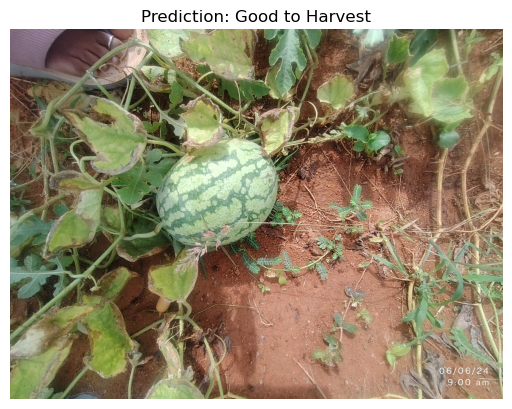

Final Prediction: Good to Harvest


In [59]:
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from PIL import Image

def predict_image(image_path, model):
    image = Image.open(image_path).convert("RGB")

    # Apply the same transformation used in training
    transform = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    
    image_tensor = transform(image).unsqueeze(0).to(device)

    # Make prediction
    model.eval()
    with torch.no_grad():
        output = model(image_tensor)
        _, prediction = torch.max(output, 1)

    label_map = {1: "Good to Harvest", 0: "Bad to Harvest"}
    predicted_label = label_map[prediction.item()]

    # Display the image with prediction
    plt.imshow(image)
    plt.title(f"Prediction: {predicted_label}")
    plt.axis("off")
    plt.show()

    return predicted_label

# Example usage:
image_path = r"C:\MurthyLab\project_classification\Water melon\IMG_20240606_090026.jpg"
prediction = predict_image(image_path, model)
print(f"Final Prediction: {prediction}")

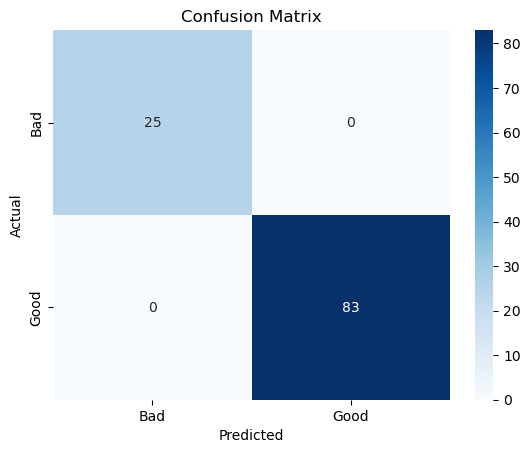


📊 Classification Report:
                 precision    recall  f1-score   support

 Bad to Harvest       1.00      1.00      1.00        25
Good to Harvest       1.00      1.00      1.00        83

       accuracy                           1.00       108
      macro avg       1.00      1.00      1.00       108
   weighted avg       1.00      1.00      1.00       108



In [34]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ✅ Gather predictions and labels
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in dataloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# ✅ Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Bad", "Good"], yticklabels=["Bad", "Good"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ✅ Classification Report
print("\n📊 Classification Report:")
print(classification_report(all_labels, all_preds, target_names=["Bad to Harvest", "Good to Harvest"]))

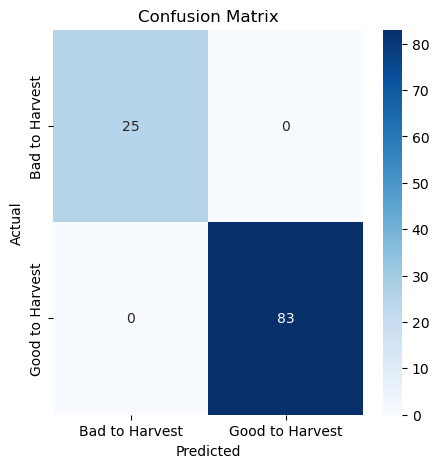

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ✅ If not already defined:
label_names = ["Bad to Harvest", "Good to Harvest"]

cm = confusion_matrix(all_labels, all_preds)

plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_names,
            yticklabels=label_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [38]:
from torch.nn.functional import softmax

all_labels = []
probs = []

model.eval()
with torch.no_grad():
    for images, labels in dataloader:
        images = images.to(device)
        outputs = model(images)
        probability = softmax(outputs, dim=1)[:, 1]  # Probability of class 1
        probs.extend(probability.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

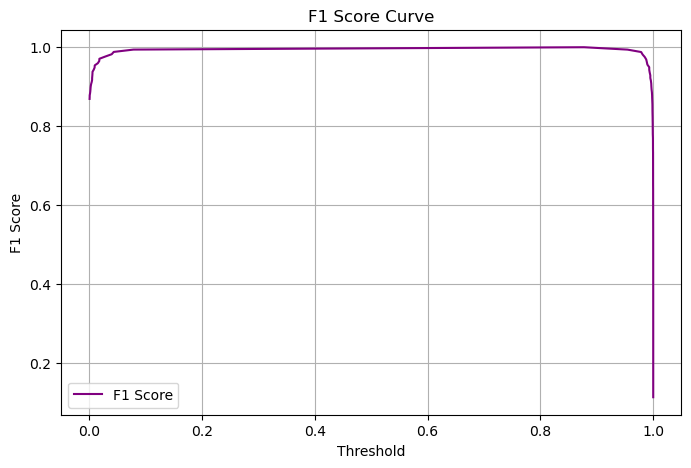

In [39]:
from sklearn.metrics import precision_recall_curve
import numpy as np
import matplotlib.pyplot as plt

# Calculate P, R, thresholds
precision, recall, thresholds = precision_recall_curve(all_labels, probs)

# Calculate F1 per threshold
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)

# Plot F1 vs threshold
plt.figure(figsize=(8, 5))
plt.plot(thresholds, f1_scores[:-1], label='F1 Score', color='purple')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score Curve')
plt.grid(True)
plt.legend()
plt.show()

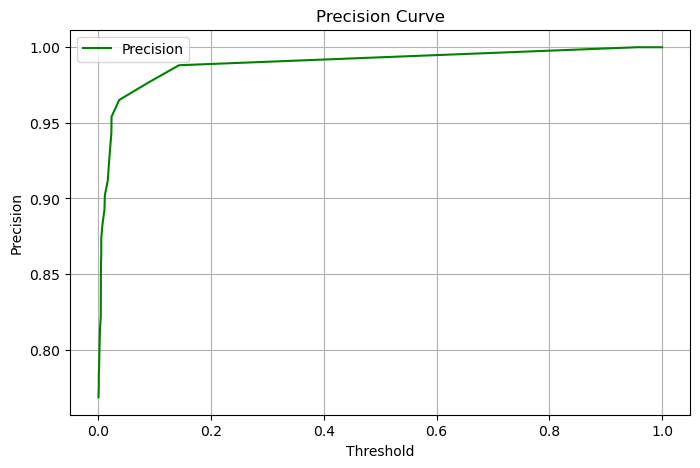

In [40]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from torch.nn.functional import softmax

# Step 1: Collect probabilities and true labels
all_labels = []
probs = []

model.eval()
with torch.no_grad():
    for images, labels in dataloader:
        images = images.to(device)
        outputs = model(images)
        probabilities = softmax(outputs, dim=1)[:, 1]  # Class 1: Good to Harvest
        probs.extend(probabilities.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Step 2: Get precision-recall pairs
precision, recall, thresholds = precision_recall_curve(all_labels, probs)

# Step 3: Plot precision vs threshold
plt.figure(figsize=(8, 5))
plt.plot(thresholds, precision[:-1], label='Precision', color='green')
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.title('Precision Curve')
plt.grid(True)
plt.legend()
plt.show()

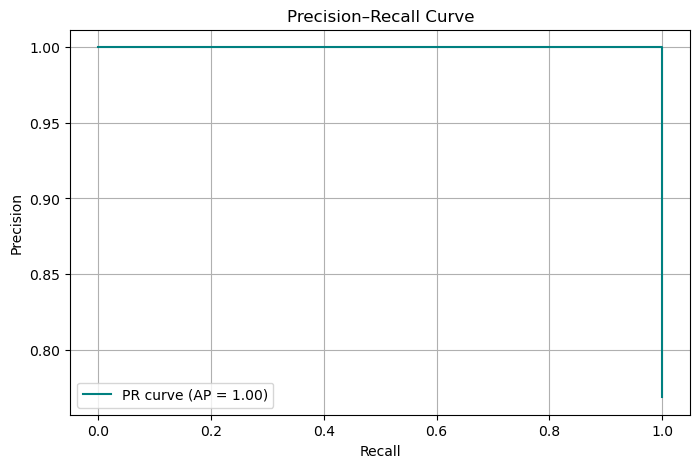

In [41]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
from torch.nn.functional import softmax

# Step 1: Collect predictions and probabilities
all_labels = []
probs = []

model.eval()
with torch.no_grad():
    for images, labels in dataloader:
        images = images.to(device)
        outputs = model(images)
        probabilities = softmax(outputs, dim=1)[:, 1]  # Prob of class 1
        probs.extend(probabilities.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Step 2: Calculate precision, recall
precision, recall, _ = precision_recall_curve(all_labels, probs)
ap_score = average_precision_score(all_labels, probs)

# Step 3: Plot the PR curve
plt.figure(figsize=(8, 5))
plt.plot(recall, precision, color='teal', label=f'PR curve (AP = {ap_score:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision–Recall Curve')
plt.grid(True)
plt.legend()
plt.show()

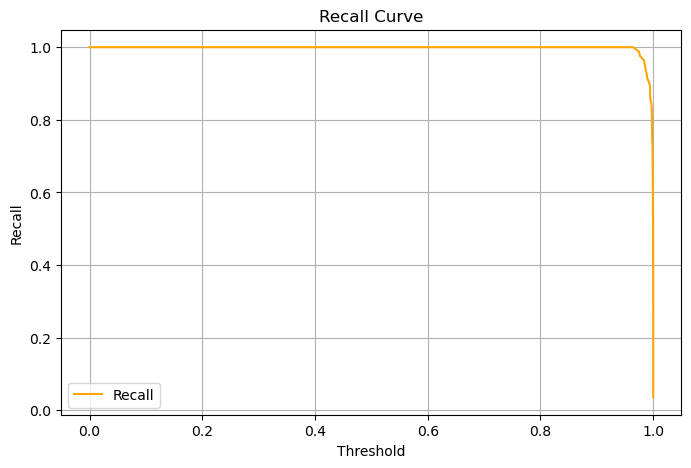

In [42]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from torch.nn.functional import softmax

# Step 1: Get probs and true labels
all_labels = []
probs = []

model.eval()
with torch.no_grad():
    for images, labels in dataloader:
        images = images.to(device)
        outputs = model(images)
        probabilities = softmax(outputs, dim=1)[:, 1]  # Class 1: Good to Harvest
        probs.extend(probabilities.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Step 2: Compute precision-recall-thresholds
precision, recall, thresholds = precision_recall_curve(all_labels, probs)

# Step 3: Plot recall vs threshold
plt.figure(figsize=(8, 5))
plt.plot(thresholds, recall[:-1], label="Recall", color="orange")
plt.xlabel("Threshold")
plt.ylabel("Recall")
plt.title("Recall Curve")
plt.grid(True)
plt.legend()
plt.show()